## CA 2, LLMs Spring 2024

- **Name:** *Pouya Sadeghi*
- **Student ID:** *810199447*

---
#### Your submission should be named using the following format: `CA2_LASTNAME_STUDENTID_soft_prompt.ipynb`.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

If you have any further questions or concerns, contact the TA via email:
mohammad136631@gmail.com

---

# What are Soft prompts?
Soft prompts are learnable tensors concatenated with the input embeddings that can be optimized to a dataset; the downside is that they aren’t human readable because you aren’t matching these “virtual tokens” to the embeddings of a real word.
<br>
<div>
<img src="https://www.researchgate.net/publication/366062946/figure/fig1/AS:11431281105340756@1670383256990/The-comparison-between-the-previous-T5-prompt-tuning-method-part-a-and-the-introduced.jpg"/>
</div>

Read More:
<br>[Youtube : PEFT and Soft Prompt](https://www.youtube.com/watch?v=8uy_WII76L0)
<br>[Paper: The Power of Scale for Parameter-Efficient Prompt Tuning](https://arxiv.org/pdf/2104.08691.pdf)
https://arxiv.org/pdf/2101.00190.pdf
<br>[Paper: Prefix-Tuning: Optimizing Continuous Prompts for Generation](https://arxiv.org/pdf/2101.00190.pdf)

# Part 1 (20 Points)
Before diving into the practical applications, let's first ensure your foundational knowledge is solid. Please answer the following questions.

---
**A) Compare and contrast model tuning and prompt tuning in terms of their effectiveness for specific downstream tasks. (5 Points)**

Based on `The Power of Scale for Parameter-Efficient Prompt Tuning` (Brian et al. 2021), we can understand that for larger models (say 10B) prompt-tuning is able to achieve model-tuning performance. It seems that prompt-tuning could be as effective as model-tuning on large models, but we should be careful with smaller models.
Performance on different evaluations reported:
- (**Figure 1**) By increasing model size, the gap between model tuning and prompt-tuning would decrease, till they converge at 10B
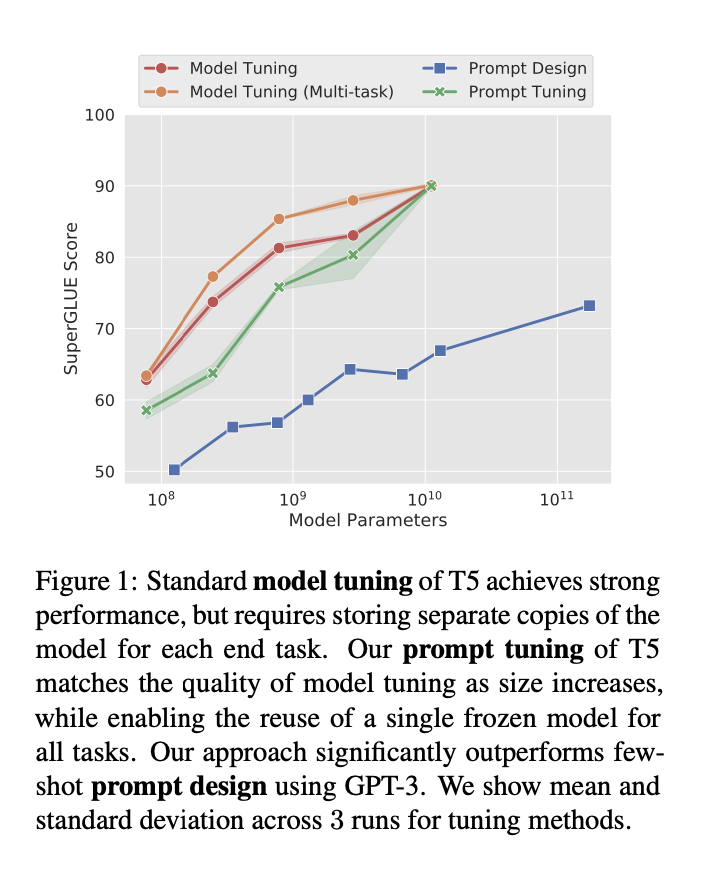

- (**Table 1**) models trained on SQuAD and evaluated on out-of-domain datasets from the MRQA 2019 shared task -> Prompt tuning tends to give stronger zero-shot performance than model tuning, especially on datasets with large domain shifts like TextbookQA.
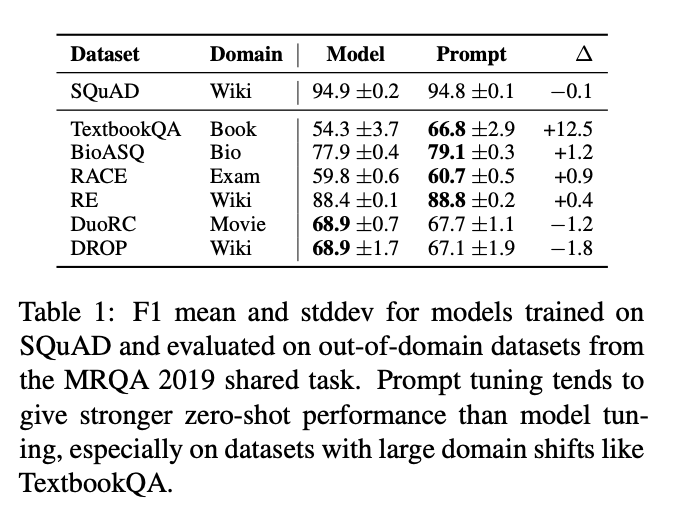
- (**Table 2**) zero-shot domain transfer between two paraphrase detection tasks, *QQP* and *MRPC* -> prompt-tuning is able to outperform model-tuning except in (MRPC)-[transfer to]-(QQP), in which it is still able to get close to model-tuning.
![Screenshot 2024-04-24 at 3.06.09 PM.png](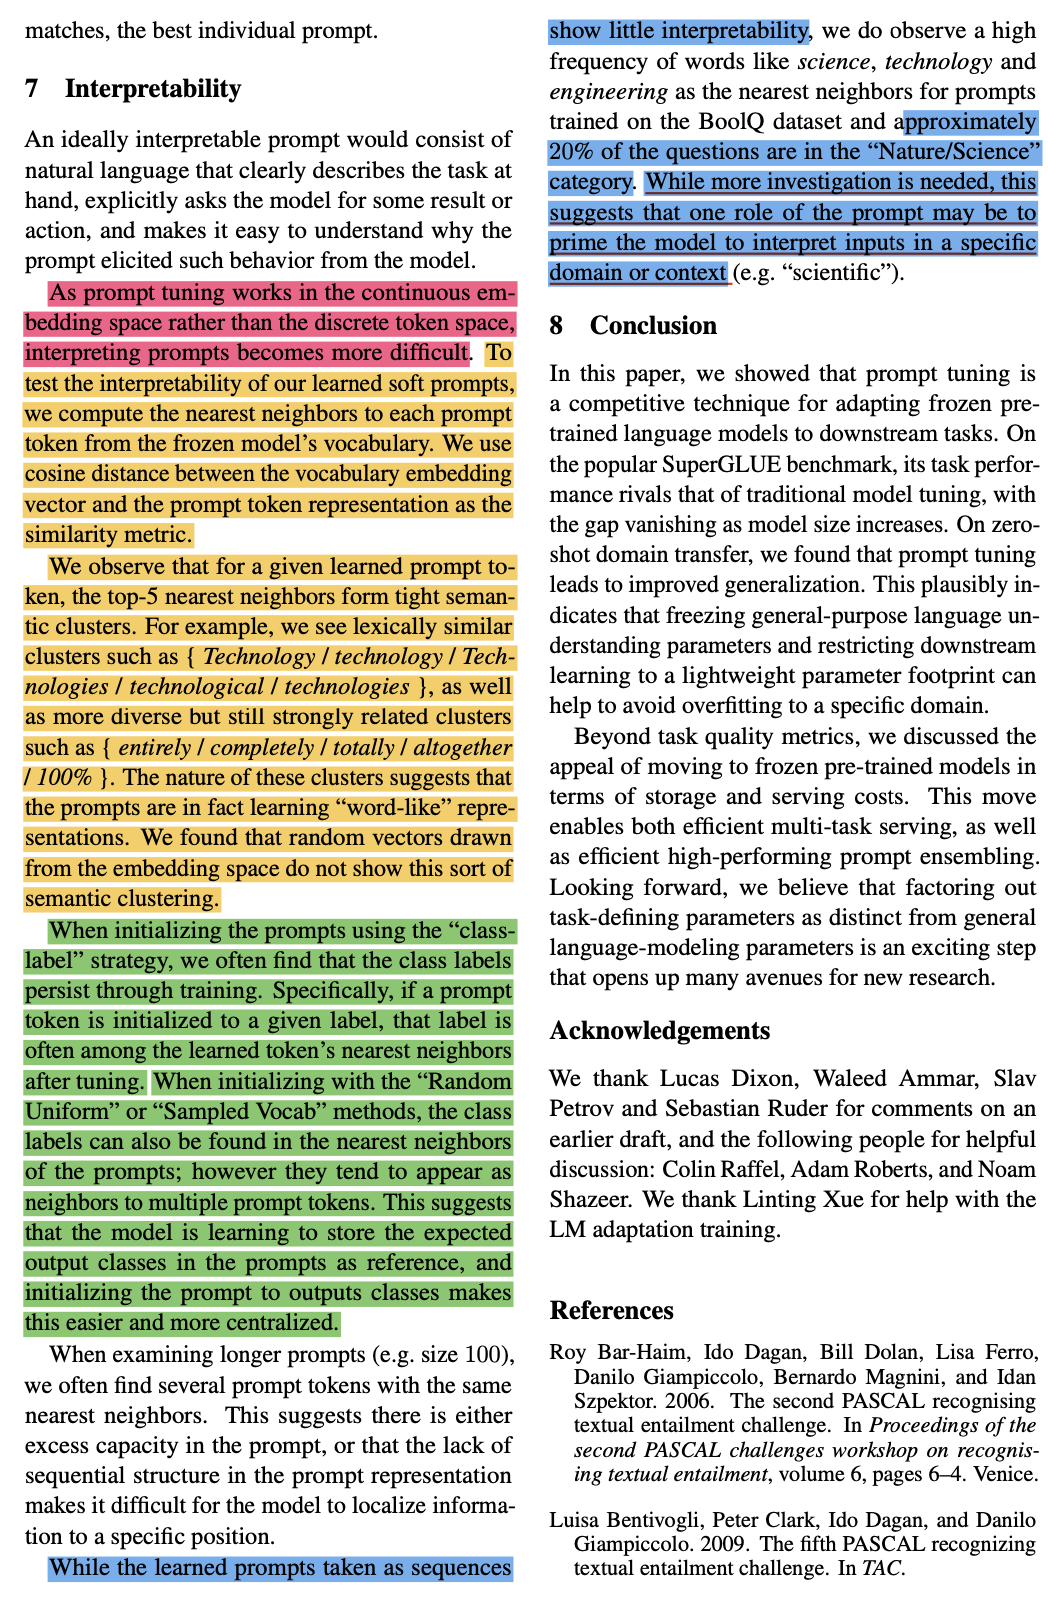+jQh0AunshDK0sUqVlBAQAkJACAiBBgREnBvg0I0QqI+A11N3XpcwJOD13p3Xf6+f2ADF7IQyDBB0eq0QEAJCQAh0AQIizl1QySpi/yDgP3wRdNF5m/8EuPN2gvvnxW18SyeUoY1wKCkhIASEgBAQAg0IiDg3wKEbIVAdAW/VwPkP1YSDjRabAzoc9ORAp7cUYI8H7bUTyjBowVXGhIAQEAJCoGMQEHHumKpUQQYKAU7fYzUhz3nTcsG6Rp7fYHrWCWUYTHgqL0JACAgBIdCZCIg4d2a9qlRCQAgIASEgBISAEBACbUZAxLnNgCo5ISAEhIAQEAJCQAgIgc5EQMS5M+tVpRICQkAICAEhIASEgBBoMwIizm0GVMkJASEgBISAEBACQkAIdCYCIs6dWa8qlRAQAkJACAgBISAEhECbERBxbjOgSk4ICAEhIASEgBAQAkKgMxEQce7MelWphIAQEAJCQAgIASEgBNqMgIhzmwFVckJACAgBISAEhIAQEAKdiYCIc2fWq0olBISAEBACQkAICAEh0GYERJzbDKiSEwJCQAgIASEgBISAEOhMBEScO7NeVSohIASEgBAQAkJACAiBNiMg4txmQJWcEBACQkAICAEhIASEQGciIOLcmfWqUgkBISAEhIAQEAJCQAi0GQER5zYDquSEgBAQAkJACAgBISAEOhMBEefOrFeVSggIASEgBISAEBACQqDNCIg4txlQJScEhIAQEAJCQAgIASHQmQiIOHdmvapUQkAICAEhIASEgBAQAm1GQMS5zYAqOSEgBISAEBACQkAICIHOREDEuTPrVaUSAkJACAgBISAEhIAQaDMCIs5tBlTJCQEhIASEgBAQAkJACHQmAiLOnVmvKpUQEAJCQAgIASEgBIRAmxEQcW4zoEpOCAgBISAEhIAQEAJCoDMREHHuzHpVqYSAEBACQkAICAEhIATajICIc5sBVXJCQAgIASEgBISAEBACnYmAiHNn1qtKJQSEgBAQAkJACAgBIdBmBESc2wyokhMCQkAICAEhIASEgBDoTAREnDuzXlUqISAEhIAQEAJCQAgIgTYjIOLcZkCVnBAQAkJACAgBISAEhEBnIiDi3Jn1qlIJASEgBISAEBACQkAItBkBEec2A6rkhIAQEAJCQAgIASEgBDoTARHnzqxXlUoICAEhIASEgBAQAkKgzQiIOLcZUCUnBISAEBACQkAICAEh0JkIiDh3Zr2qVEJACAgBISAEhIAQEAJtRkDEuc2AKjkhIASEgBAQAkJACAiBzkRAxLkz61WlEgJCQAgIASEgBISAEGgzAiLObQZUyQkBISAEhIAQEAJCQAh0JgIizp1ZryqVEBACQkAICAEhIASEQJsREHFuM6BKTggIASEgBISAEBACQqAzERBx7sx6VamEgBAQAkJACAgBISAE2oyAiHObAVVyQkAICAEhIASEgBAQAp2JgIhzZ9arSiUEhIAQEAJCQAgIASHQZgREnNsMqJITAkJACAgBISAEhIAQ6EwERJw7s15VKiEgBISAEBACQkAICIE2IyDi3GZAlZwQEAJCQAgIASEgBIRAZyIg4tyZ9apSCQEhIASEgBAQAkJACLQZARHnNgOq5ISAEBACQkAICAEhIAQ6EwER586sV5VKCAgBISAEhIAQEAJCoM0IiDi3GVAlJwSEgBAQAkJACAgBIdCZCIg4d2a9qlRCQAgIASEgBISAEBACbUZAxLnNgCo5ISAEhIAQEAJCQAgIgc5EQMS5M+tVpRICQkAICAEhIASEgBBoMwIizm0GVMkJASEgBISAEBACQkAIdCYCIs6dWa8qlRAQAkJACAgBISAEhECbEfh/Ilq/iqjzbbUAAAAASUVORK5CYII=)
![Screenshot 2024-04-24 at 3.06.09 PM.png](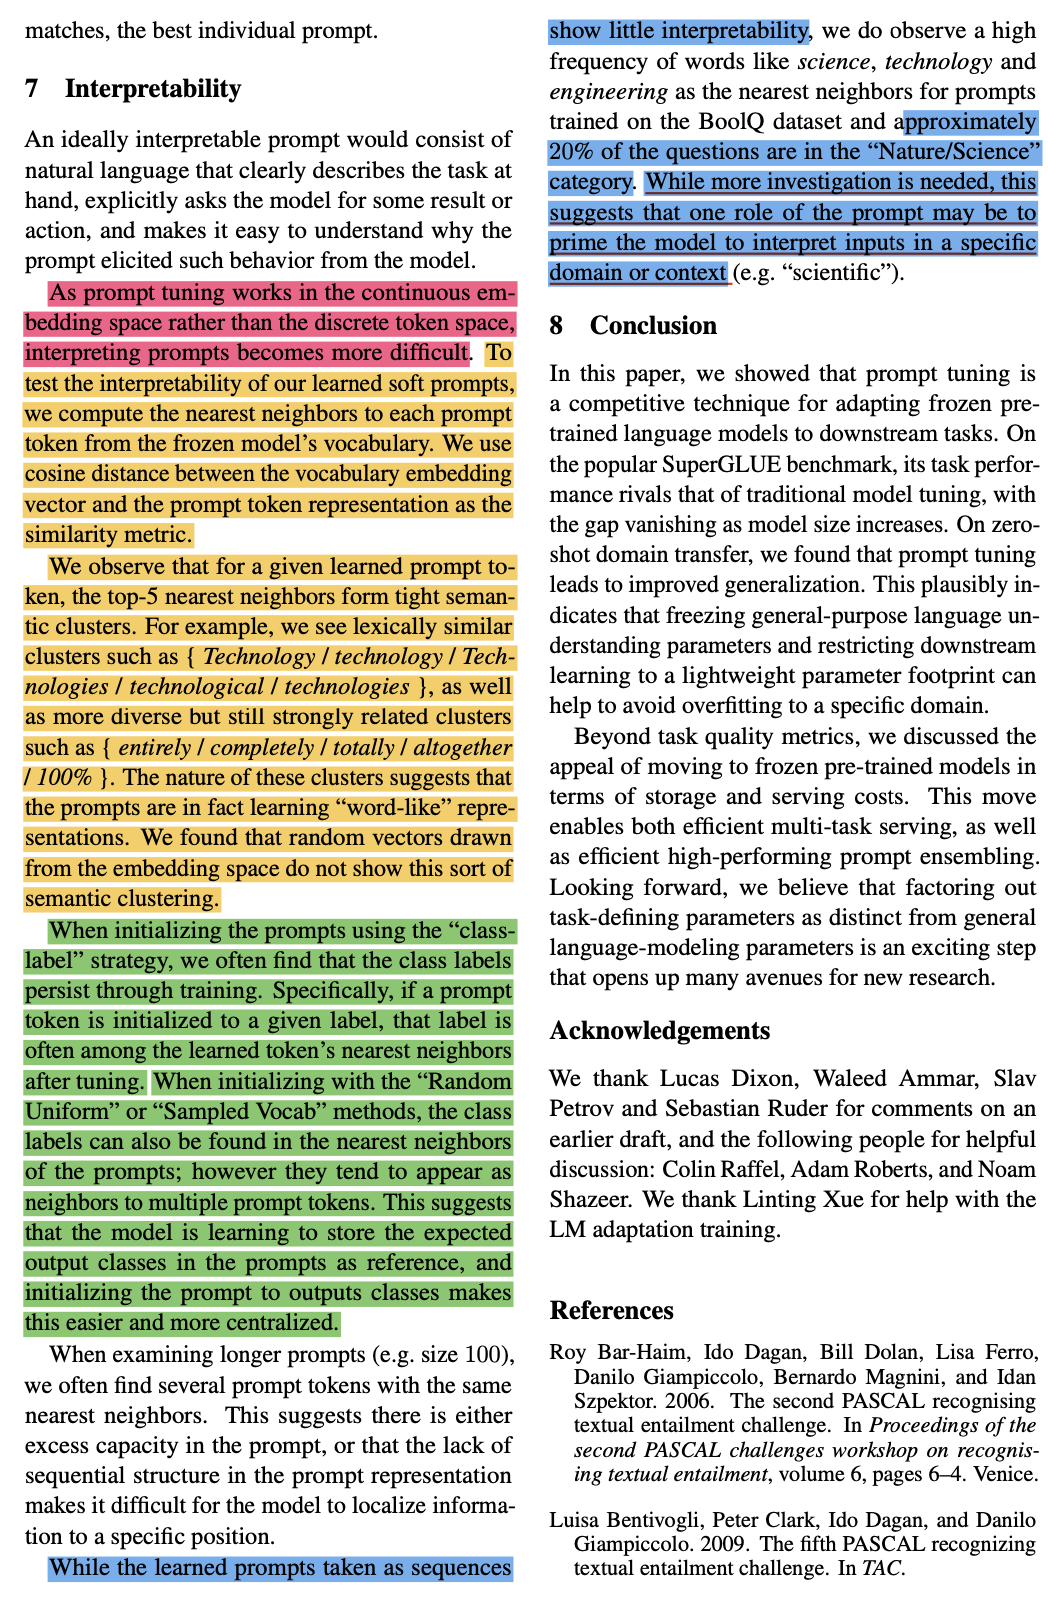+jQh0AunshDK0sUqVlBAQAkJACAiBBgREnBvg0I0QqI+A11N3XpcwJOD13p3Xf6+f2ADF7IQyDBB0eq0QEAJCQAh0AQIizl1QySpi/yDgP3wRdNF5m/8EuPN2gvvnxW18SyeUoY1wKCkhIASEgBAQAg0IiDg3wKEbIVAdAW/VwPkP1YSDjRabAzoc9ORAp7cUYI8H7bUTyjBowVXGhIAQEAJCoGMQEHHumKpUQQYKAU7fYzUhz3nTcsG6Rp7fYHrWCWUYTHgqL0JACAgBIdCZCIg4d2a9qlRCQAgIASEgBISAEBACbUZAxLnNgCo5ISAEhIAQEAJCQAgIgc5EQMS5M+tVpRICQkAICAEhIASEgBBoMwIizm0GVMkJASEgBISAEBACQkAIdCYCIs6dWa8qlRAQAkJACAgBISAEhECbERBxbjOgSk4ICAEhIASEgBAQAkKgMxEQce7MelWphIAQEAJCQAgIASEgBNqMgIhzmwFVckJACAgBISAEhIAQEAKdiYCIc2fWq0olBISAEBACQkAICAEh0GYERJzbDKiSEwJCQAgIASEgBISAEOhMBEScO7NeVSohIASEgBAQAkJACAiBNiMg4txmQJWcEBACQkAICAEhIASEQGciIOLcmfWqUgkBISAEhIAQEAJCQAi0GQER5zYDquSEgBAQAkJACAgBISAEOhMBEefOrFeVSggIASEgBISAEBACQqDNCIg4txlQJScEhIAQEAJCQAgIASHQmQiIOHdmvapUQkAICAEhIASEgBAQAm1GQMS5zYAqOSEgBISAEBACQkAICIHOREDEuTPrVaUSAkJACAgBISAEhIAQaDMCIs5tBlTJCQEhIASEgBAQAkJACHQmAiLOnVmvKpUQEAJCQAgIASEgBIRAmxEQcW4zoEpOCAgBISAEhIAQEAJCoDMREHHuzHpVqYSAEBACQkAICAEhIATajICIc5sBVXJCQAgIASEgBISAEBACnYmAiHNn1qtKJQSEgBAQAkJACAgBIdBmBESc2wyokhMCQkAICAEhIASEgBDoTAREnDuzXlUqISAEhIAQEAJCQAgIgTYjIOLcZkCVnBAQAkJACAgBISAEhEBnIiDi3Jn1qlIJASEgBISAEBACQkAItBkBEec2A6rkhIAQEAJCQAgIASEgBDoTARHnzqxXlUoICAEhIASEgBAQAkKgzQiIOLcZUCUnBISAEBACQkAICAEh0JkIiDh3Zr2qVEJACAgBISAEhIAQEAJtRkDEuc2AKjkhIASEgBAQAkJACAiBzkRAxLkz61WlEgJCQAgIASEgBISAEGgzAiLObQZUyQkBISAEhIAQEAJCQAh0JgIizp1ZryqVEBACQkAICAEhIASEQJsREHFuM6BKTggIASEgBISAEBACQqAzERBx7sx6VamEgBAQAkJACAgBISAE2oyAiHObAVVyQkAICAEhIASEgBAQAp2JgIhzZ9arSiUEhIAQEAJCQAgIASHQZgREnNsMqJITAkJACAgBISAEhIAQ6EwERJw7s15VKiEgBISAEBACQkAICIE2IyDi3GZAlZwQEAJCQAgIASEgBIRAZyIg4tyZ9apSCQEhIASEgBAQAkJACLQZARHnNgOq5ISAEBACQkAICAEhIAQ6EwER586sV5VKCAgBISAEhIAQEAJCoM0IiDi3GVAlJwSEgBAQAkJACAgBIdCZCIg4d2a9qlRCQAgIASEgBISAEBACbUZAxLnNgCo5ISAEhIAQEAJCQAgIgc5EQMS5M+tVpRICQkAICAEhIASEgBBoMwIizm0GVMkJASEgBISAEBACQkAIdCYCIs6dWa8qlRAQAkJACAgBISAEhECbEfh/Ilq/iqjzbbUAAAAASUVORK5CYII=)


---


**B) Explore the challenges associated with interpreting soft prompts in the continuous embedding space and propose potential solutions. (5 Points)**

An ideal interpretable prompt from the paper's point of view:
- An ideally interpretable prompt would consist of natural language that clearly describes the task at hand, explicitly asks the model for some result or action, and makes it easy to understand why the prompt elicited such behavior from the model.

Soft prompts are vectors of real numbers that are prepended to the embedding layer of a PLM. As embeddings are on a continuous space of numbers and words of a language, generate a discrete token space, interpreting prompts becomes difficult.

Another problem with Soft Prompt tuning in continuous space is that soft prompts may not align well with the intended task or safety constraints. Ensuring that soft prompts guide the model towards desired behavior becomes more complex due to their continuous nature. Also, as explored by authors, embedding would get close into most seen context, so, they may expose some information about training data.

The solution that the paper suggest for this problem:
- To test the interpretability of our learned soft prompts, we compute the nearest neighbors to each prompt token from the frozen model’s vocabulary. We use cosine distance between the vocabulary embedding vector and the prompt token representation as the similarity metric.
- They want their prompt learns “word-like” representations, and random vectors drawn from the embedding space do not show this sort of semantic clustering.
- One approach ti address this problem is that to take anvantage on human help. After each epochs, we can show a human some near nighbor for each token (say 5 neighbor) then human can compile into a prompt and starting the next epoch from that prompt.
- We may define constraints or regularization for soft prompt tuning.  For example, penalizing divergence from a predefined set of safe behaviors could improve safety alignment.

The authors mentioned that model would prefer to stire information about the category or context most seen during training.


---



**C) What is the effect of initializing prompts randomly versus initializing them from the vocabulary, and how does this impact the performance of prompt tuning? (5 Points)**

Let's see how each initialization works:
-  For random initialization, we sample uniformly from the range [−0.5, 0.5]
- When initializing from sampled vocabulary, we restrict to the 5,000 most “common” tokens in T5’s Sentence- Piece vocabulary, which is ordered by likelihood in the pre-training corpus

also, it may worth to know: For “class label” initialization, we take the embeddings for the string representations of each class in the downstream task and use them to initialize one of the tokens in the prompt.

The reported result is: * Random uniform initialization lags behind more “advanced” initializations using sampled vocabulary or class label embeddings, but the difference vanishes at XXL size.*

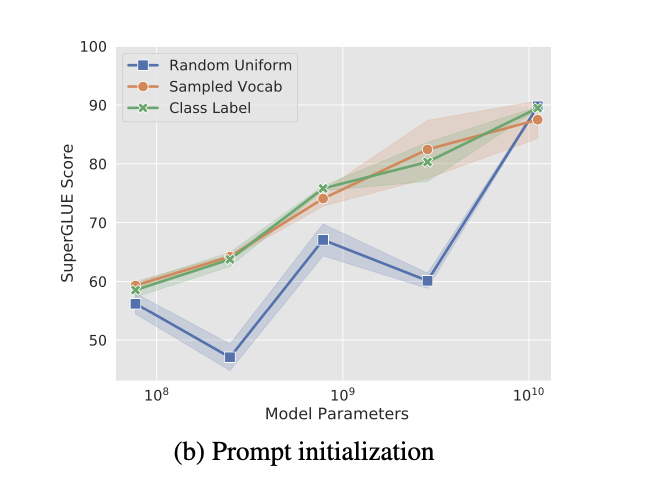

So, it seems better to **initializing them from the vocabulary** to achieve higher performance.

---


**D) How is the optimization process in the prefix tuning(<br>[Prefix-Tuning: Optimizing Continuous Prompts for Generation](https://arxiv.org/pdf/2101.00190.pdf)) and Why did they use this technique? (5 Points)**

In prefix-tuning, we keep model's original parameters frozen, adding additional vectors to model, representing as a prefix for the input (we add this vectors individually for each transformer block, also known as irtual tokens) and updating/fine-tuning these vectors for a task we desired. This approach, by effecting only a small fraction of model's parameters (just virtual tokens) achieves comparable performance to fine-tuning on full data, outperforms fine-tuning in low-data regime, and is able to generalizes better to examples with unseen topics during training.

We use prefix-tuning for several advantages such as:
- Being lightwaight and needing lower resources that full fine-tuning, as it requires updating far fewer parameters vs. fine-tuning.
- It allows us to come with more expressive prompts due to the continuous optimization.
- The authors used prefix-tuning on GPT-2 for table-to-text generation and on BART for summarization, showing its effectiveness in various natural language generation tasks.
- being modular and by just replacing prefixes, we can adopt them to a completely different task vs. in fine-tuning we need to replace model by another instance that fine-tuned on the new task and can't share the same model for different tasks.


---

# Part 2 (35 points)

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import transformers
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoModel
from transformers import AdamW
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

## Model Selection & Constants
We will use `bert-fa-base-uncased` as our base model from Hugging Face ([HF_Link](https://huggingface.co/HooshvareLab/bert-fa-base-uncased)). For our tuning, we intend to utilize 20 soft prompt tokens.

In [2]:
class CONFIG:
    seed = 42
    max_len = 128
    train_batch = 16
    valid_batch = 32
    epochs  = 10
    n_tokens=20
    learning_rate = 0.01
    model_name = 'HooshvareLab/bert-fa-base-uncased'
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

config.json:   0%|          | 0.00/440 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.20M [00:00<?, ?B/s]

## Dataset

The dataset contains around 7000 Persian sentences and their corresponding polarity, and have been manually classified into 5 categories (i.e. Angry).

### Load Dataset

In [3]:
!pip install gdown -q

!gdown 13KU3Fek5C_M61bt1aUsnRKk6WHcdVf2g -O sp-dataset.csv

Downloading...
From: https://drive.google.com/uc?id=13KU3Fek5C_M61bt1aUsnRKk6WHcdVf2g
To: /content/sp-dataset.csv
100% 1.29M/1.29M [00:00<00:00, 107MB/s]


In [4]:
import pandas as pd
file_path = "sp-dataset.csv"
df = pd.read_csv(file_path)

In [5]:
df.head(3)

,text,label
0,دوربین اصلی این گوشی دارای یک سنسور مگاپیکسلی ...,0
1,کارت‌های حافظه ای که معمولا بر روی گوشی‌های هو...,0
2,اندازه رزولوشن نمایشگر iPod دقیقا همانند iPhon...,0


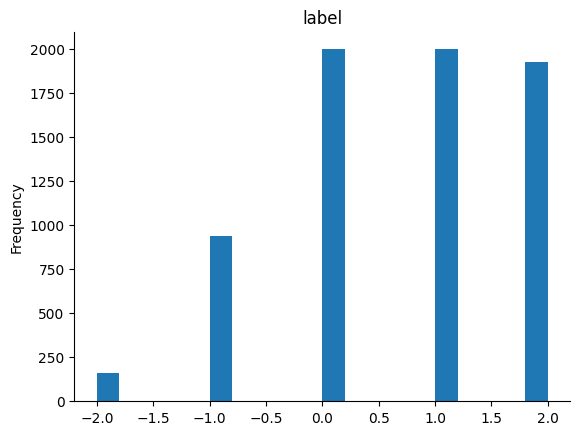

In [6]:
from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Pre-Processing

In [7]:
%pip install -U -q clean-text[gpl]
%pip install -q hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 24.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1

In [8]:
import re
from cleantext import clean
from hazm import *

In [9]:
import re
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

def cleaning(text):
    text = text.strip()

    # regular cleaning
    text = clean(text,
        fix_unicode=True,
        to_ascii=False,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=False,
        no_digits=False,
        no_currency_symbols=True,
        no_punct=False,
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="0",
        replace_with_currency_symbol="",
    )

    text = cleanhtml(text)

    # normalizing
    #normalizer = hazm.Normalizer()
    #text = normalizer.normalize(text)

    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)

    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)

    return text

In [10]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

tqdm.pandas()

def parallel_apply_with_progress(df, func, n_workers=4):
    with ThreadPoolExecutor(max_workers=n_workers) as executor, tqdm(total=len(df)) as pbar:
        def update(*args):
            pbar.update()

        results = []
        for result in executor.map(func, df['text']):
            results.append(result)
            update()

        df['text'] = pd.Series(results)

    return df

In [11]:
df = parallel_apply_with_progress(df, cleaning)

100%|██████████| 7023/7023 [00:02<00:00, 3076.07it/s]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values,
                                                  df.label.values,
                                                  test_size=0.15,
                                                  random_state=42,
                                                  stratify=df.label.values)

train_df = df.loc[X_train]
validation_df = df.loc[X_val]

In [13]:
possible_labels = df.label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{0: 0, 1: 1, 2: 2, -1: 3, -2: 4}

In [14]:
train_df['label'] = train_df.label.replace(label_dict)
validation_df['label'] = validation_df.label.replace(label_dict)

### Create Dataset Class (5 Points)
In this step we will getting our dataset ready for training.

In this part we will define BERT-based dataset class for text classification, with configuration parameters. It preprocesses text data and tokenizes it using the BERT tokenizer.


Complete the preprocessing step in the __getitem__ method by adding padding tokens to 'input_ids' and 'attention_mask',
The count of this pad tokens is the same as `n_tokens`.

In [15]:
class BERTDataset(Dataset):
    def __init__(self,df):
        self.text = df['text'].values
        self.labels = df['label'].values
        self.all_labels = [0, 1, 2, 3, 4]
        self.max_len = CONFIG.max_len
        self.tokenizer = CONFIG.tokenizer
        self.n_tokens=CONFIG.n_tokens

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = self.text[index]
        text = ' '.join(text.split())
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True
        )

        ######### Your code begins #########
        # inputs['input_ids'] = inputs['input_ids'] + [self.tokenizer.pad_token_id] * (self.n_tokens - len(inputs['input_ids']))
        # inputs['attention_mask'] = inputs['attention_mask'] + [0] * (self.n_tokens - len(inputs['attention_mask']))
        inputs['input_ids'] = inputs['input_ids'] + [self.tokenizer.pad_token_id] * self.n_tokens
        inputs['attention_mask'] = inputs['attention_mask'] + [0] * self.n_tokens
        ######### Your code ends ###########

        labels = self.labels[index]
        label_dict = {label: (label == labels) for label in self.all_labels}
        labels_tensor = torch.tensor([float(label_dict[label]) for label in self.all_labels])
        # return {
        #     'ids': torch.tensor(inputs['input_ids']),
        #     'mask': torch.tensor(inputs['attention_mask']),
        #     'label': labels_tensor
        # }
        return {
            'ids': torch.tensor(inputs['input_ids'], dtype=torch.long),
            'mask': torch.tensor(inputs['attention_mask'], dtype=torch.long),
            'label': labels_tensor
        }


In [16]:
train_dataset = BERTDataset(train_df)
validation_dataset = BERTDataset(validation_df)

## Define Prompt Embedding Layer (15 Points)
In this part we will define our prompt layer in `PROMPTEmbedding` module.


<font color='#73FF73'><b>You have to complete</b></font> `initialize_embedding` and  `forward` <font color='#73FF73'><b>functions.</b></font>

In `initialize_embedding` function initialize the learned embeddings based on whether they should be initialized from the vocabulary or randomly within the specified range.

In `forward` function, modify the input_embedding to extract the relevant part based on n_tokens.

Repeat the learned_embedding to match the size of input_embedding.

Concatenate the learned_embedding and input_embedding properly.


In [ ]:
class PROMPTEmbedding(nn.Module):
    def __init__(self,
                emb_layer: nn.Embedding,
                n_tokens: int = 20,
                random_range: float = 0.5,
                initialize_from_vocab: bool = True):

      super(PROMPTEmbedding, self).__init__()
      self.emb_layer = emb_layer
      self.n_tokens = n_tokens
      self.learned_embedding = nn.parameter.Parameter(self.initialize_embedding(emb_layer,
                                                                               n_tokens,
                                                                               random_range,
                                                                               initialize_from_vocab))

    def initialize_embedding(self,
                             emb_layer: nn.Embedding,
                             n_tokens: int = 20,
                             random_range: float = 0.5,
                             initialize_from_vocab: bool = True):

      if initialize_from_vocab:
        ######### Your code begins #########
        emb = emb_layer.weight[:n_tokens].clone().detach()
      else:
        emb = torch.rand((n_tokens, emb_layer.weight.size(1))) * random_range
        ######### Your code ends ###########
      return emb


    def forward(self, tokens):
    # def forward(self, tokens, **kwargs):
      # print(kwargs.keys())
      ######### Your code begins #########
      input_embedding = self.emb_layer(tokens[:, self.n_tokens:])
      learned_embedding = self.learned_embedding.repeat(tokens.size(0), 1, 1)
      joined_embedding = torch.cat((learned_embedding, input_embedding), dim=1)
      ######### Your code ends ###########
      return joined_embedding

## Replace model's embedding layer with our layer (5 Points)

In [ ]:
# Define your BERT model
model = AutoModelForSequenceClassification.from_pretrained(
    CONFIG.model_name,
    num_labels=5,
    output_attentions=False,
    output_hidden_states=False
    ).to(CONFIG.device)
######### Your code begins #########
# model.bert.embeddings = PROMPTEmbedding(
#     model.bert.embeddings.word_embeddings,
#     n_tokens=CONFIG.n_tokens
#     ).to(CONFIG.device)
embs = PROMPTEmbedding(
    model.get_input_embeddings(),
    n_tokens=CONFIG.n_tokens
).to(CONFIG.device)
model.set_input_embeddings(embs)
######### Your code ends ###########


pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Freezing Model Parameters (5 points)
In this part we will freeze entire model except `learned_embedding`

In [ ]:
def check_learnable_parameters(model: torch.nn.Module):
    num_leanable_params = sum(p.numel() for _, p in model.named_parameters() if p.requires_grad)
    num_params = sum(p.numel() for _, p in model.named_parameters())
    learnable_parts = []
    for n, p in model.named_parameters():
      num_params += p.numel()
      if p.requires_grad:
        num_leanable_params += p.numel()
        learnable_parts.append(n)
    print(f"Whole model parameters count    : {num_params:<10}")
    print(f"Learnable model parameters count: {num_leanable_params:<10} ({100*num_leanable_params/num_params:.3f}%)")
    for n in learnable_parts:
      print("\t", n)

In [ ]:
# ######### Your code begins #########
for name, param in model.named_parameters():
    param.requires_grad = False
    if "learned_embedding" in name:
      param.requires_grad = True
      print("Back propagation activated for 'learned_embedding'")
######### Your code ends ###########

Back propagation activated for 'learned_embedding'


In [ ]:
check_learnable_parameters(model)

Whole model parameters count    : 325721098 
Learnable model parameters count: 30720      (0.009%)
	 bert.embeddings.word_embeddings.learned_embedding


## Optimizer


In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=CONFIG.learning_rate)

## Training & Evaluation


### Define dataloaders

In [17]:
train_loader = DataLoader(
    train_dataset,
    batch_size=CONFIG.train_batch,
    num_workers=2,
    shuffle=True,
    pin_memory=True
    )

validation_loader = DataLoader(
    validation_dataset,
    batch_size=CONFIG.valid_batch,
    num_workers=2,
    shuffle=True,
    pin_memory=True
    )

### Define evaluation function

In [18]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = np.argmax(labels, axis=1).flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [19]:
def evaluate(val_dataloader):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in val_dataloader:


        inputs = {'input_ids':      batch['ids'].to(CONFIG.device),
                  'attention_mask': batch['mask'].to(CONFIG.device),
                  'labels':         batch['label'].to(CONFIG.device),
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs["loss"]
        logits = outputs["logits"]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(val_dataloader)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

### Define trainng loop


In [20]:
def train(model, optimizer, train_dataloader, val_dataloader):

    epochs = CONFIG.epochs

    for epoch in tqdm(range(1, epochs+1)):

      model.train()

      loss_train_total = 0

      progress_bar = tqdm(train_loader, desc='Epoch {:1d}'.format(epoch), leave=False, disable=True)

      for batch in progress_bar:

        optimizer.zero_grad()

        inputs = {'input_ids':      batch['ids'].to(CONFIG.device),
                  'attention_mask': batch['mask'].to(CONFIG.device),
                  'labels':         batch['label'].to(CONFIG.device),
                }

        output = model(**inputs)

        loss = output["loss"]
        loss_train_total += loss.item()

        loss.backward()
        optimizer.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


      tqdm.write(f'\nEpoch {epoch}')
      loss_train_avg = loss_train_total/len(train_loader)
      tqdm.write(f'Training loss: {loss_train_avg}')


      val_loss, predictions, true_vals = evaluate(val_dataloader)
      val_f1 = f1_score_func(predictions, true_vals)
      tqdm.write(f'Validation loss: {val_loss}')
      tqdm.write(f'F1 Score (Weighted): {val_f1}')


### Run

In [ ]:
train(model=model, optimizer=optimizer, train_dataloader=train_loader, val_dataloader=validation_loader)

  0%|          | 0/10 [01:38<?, ?it/s]


Epoch 1
Training loss: 0.47306686089956823


 10%|█         | 1/10 [01:48<16:13, 108.17s/it]

Validation loss: 0.45990527218038385
F1 Score (Weighted): 0.2556334687024371


 10%|█         | 1/10 [03:30<16:13, 108.17s/it]


Epoch 2
Training loss: 0.4644070557731996


 20%|██        | 2/10 [03:40<14:46, 110.75s/it]

Validation loss: 0.45689088015845325
F1 Score (Weighted): 0.20846439610536854


 20%|██        | 2/10 [05:23<14:46, 110.75s/it]


Epoch 3
Training loss: 0.4616394270868862


 30%|███       | 3/10 [05:33<13:01, 111.69s/it]

Validation loss: 0.4560041373426264
F1 Score (Weighted): 0.233092284718067


 30%|███       | 3/10 [07:16<13:01, 111.69s/it]


Epoch 4
Training loss: 0.45991586794190226


 40%|████      | 4/10 [07:26<11:12, 112.10s/it]

Validation loss: 0.45529277938784973
F1 Score (Weighted): 0.30138522985686444


 40%|████      | 4/10 [09:09<11:12, 112.10s/it]


Epoch 5
Training loss: 0.4591571047184939


 50%|█████     | 5/10 [09:18<09:21, 112.31s/it]

Validation loss: 0.45526598619692255
F1 Score (Weighted): 0.2702363908120235


 50%|█████     | 5/10 [11:01<09:21, 112.31s/it]


Epoch 6
Training loss: 0.45875175106015437


 60%|██████    | 6/10 [11:11<07:29, 112.44s/it]

Validation loss: 0.4530003567536672
F1 Score (Weighted): 0.3079583026694029


 60%|██████    | 6/10 [12:54<07:29, 112.44s/it]


Epoch 7
Training loss: 0.45729659059468436


 70%|███████   | 7/10 [13:04<05:37, 112.50s/it]

Validation loss: 0.45508671258435107
F1 Score (Weighted): 0.2876355331545873


 70%|███████   | 7/10 [14:47<05:37, 112.50s/it]


Epoch 8
Training loss: 0.4577382571078877


 80%|████████  | 8/10 [14:56<03:45, 112.55s/it]

Validation loss: 0.45603109128547437
F1 Score (Weighted): 0.1907136480964362


 80%|████████  | 8/10 [16:39<03:45, 112.55s/it]


Epoch 9
Training loss: 0.45762700224942704


 90%|█████████ | 9/10 [16:49<01:52, 112.62s/it]

Validation loss: 0.45282502969106037
F1 Score (Weighted): 0.28131691843167733


 90%|█████████ | 9/10 [18:32<01:52, 112.62s/it]


Epoch 10
Training loss: 0.4564828801760699


100%|██████████| 10/10 [18:42<00:00, 112.21s/it]

Validation loss: 0.4511000992673816
F1 Score (Weighted): 0.27708279593703145


## Using OpenDelta library (5 Points)

In [21]:
!pip install git+https://github.com/thunlp/OpenDelta.git -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 623.2/623.2 kB 11.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.4/226.4 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.1/443.1 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.

In [ ]:
# !pip install opendelta

Use `OpenDelta` library to do the same thing. [link](https://opendelta.readthedocs.io/en/latest/modules/deltas.html)

For hyperparameters, test with `N_SOFT_PROMPT_TOKENS=10` and `N_SOFT_PROMPT_TOKENS=20` and report them.

### soft_token_num=10

In [23]:
######### Your code begins #########
model = AutoModelForSequenceClassification.from_pretrained(
    CONFIG.model_name,
    num_labels=5,
    output_attentions=False,
    output_hidden_states=False
    )

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
from opendelta.delta_models.soft_prompt import SoftPromptModel

model_soft_prompt_10 = SoftPromptModel(
    backbone_model=model,
    soft_token_num=10,
    init_range=0.5,
    token_init=True,
    other_expand_ids={"attention_mask": 1, "token_type_ids": 0},
    modified_modules=["root"],
)

In [25]:
for name, param in model.named_parameters():
    param.requires_grad = False
    if "soft" in name:
      param.requires_grad = True
      print("Back propagation activated for 'learned_embedding'")

Back propagation activated for 'learned_embedding'


In [26]:
from transformers import AdamW

model = model.to(CONFIG.device)
optimizer = AdamW(model.parameters(), lr=CONFIG.learning_rate)

In [27]:
check_learnable_parameters(model)

Whole model parameters count    : 325705738 
Learnable model parameters count: 15360      (0.005%)
	 soft_prompt_layer.soft_embeds


In [28]:
train(model=model, optimizer=optimizer, train_dataloader=train_loader, val_dataloader=validation_loader)

  0%|          | 0/10 [01:37<?, ?it/s]


Epoch 1
Training loss: 0.47430975950337984


 10%|█         | 1/10 [01:45<15:52, 105.85s/it]

Validation loss: 0.45446322903488623
F1 Score (Weighted): 0.22835041584434815


 10%|█         | 1/10 [03:26<15:52, 105.85s/it]


Epoch 2
Training loss: 0.45581914747462554


 20%|██        | 2/10 [03:36<14:27, 108.39s/it]

Validation loss: 0.43396004944136646
F1 Score (Weighted): 0.3817353104011261


 20%|██        | 2/10 [05:17<14:27, 108.39s/it]


Epoch 3
Training loss: 0.4421070418893335


 30%|███       | 3/10 [05:27<12:47, 109.63s/it]

Validation loss: 0.4160443797256007
F1 Score (Weighted): 0.3450608474586208


 30%|███       | 3/10 [07:08<12:47, 109.63s/it]


Epoch 4
Training loss: 0.4352479310118578


 40%|████      | 4/10 [07:18<11:00, 110.16s/it]

Validation loss: 0.4091000385356672
F1 Score (Weighted): 0.40311121266578265


 40%|████      | 4/10 [09:00<11:00, 110.16s/it]


Epoch 5
Training loss: 0.43164972076441516


 50%|█████     | 5/10 [09:09<09:12, 110.54s/it]

Validation loss: 0.4117427955974232
F1 Score (Weighted): 0.4148361020613635


 50%|█████     | 5/10 [10:51<09:12, 110.54s/it]


Epoch 6
Training loss: 0.42783077730533275


 60%|██████    | 6/10 [11:00<07:22, 110.71s/it]

Validation loss: 0.4058509288412152
F1 Score (Weighted): 0.4119401317893365


 60%|██████    | 6/10 [12:42<07:22, 110.71s/it]


Epoch 7
Training loss: 0.42555933529361684


 70%|███████   | 7/10 [12:51<05:32, 110.86s/it]

Validation loss: 0.43333558422146423
F1 Score (Weighted): 0.34227713082342026


 70%|███████   | 7/10 [14:33<05:32, 110.86s/it]


Epoch 8
Training loss: 0.42559694295579736


 80%|████████  | 8/10 [14:42<03:41, 110.91s/it]

Validation loss: 0.40310567436796246
F1 Score (Weighted): 0.4053841492353031


 80%|████████  | 8/10 [16:24<03:41, 110.91s/it]


Epoch 9
Training loss: 0.4212363907360138


 90%|█████████ | 9/10 [16:33<01:50, 110.95s/it]

Validation loss: 0.40230749953876843
F1 Score (Weighted): 0.42396468697210576


 90%|█████████ | 9/10 [18:15<01:50, 110.95s/it]


Epoch 10
Training loss: 0.42153954601542837


100%|██████████| 10/10 [18:24<00:00, 110.46s/it]

Validation loss: 0.4022341009342309
F1 Score (Weighted): 0.40016413272889323


### soft_token_num=20

In [29]:
model = AutoModelForSequenceClassification.from_pretrained(
    CONFIG.model_name,
    num_labels=5,
    output_attentions=False,
    output_hidden_states=False
    )

model_soft_prompt_20 = SoftPromptModel(
    backbone_model=model,
    soft_token_num=20,
    init_range=0.5,
    token_init=True,
    other_expand_ids={"attention_mask": 1, "token_type_ids": 0},
    modified_modules=["root"],
)

for name, param in model.named_parameters():
    param.requires_grad = False
    if "soft" in name:
      param.requires_grad = True
      print("Back propagation activated for 'learned_embedding'")

check_learnable_parameters(model)

model = model.to(CONFIG.device)
optimizer = AdamW(model.parameters(), lr=CONFIG.learning_rate)

train(model=model, optimizer=optimizer, train_dataloader=train_loader, val_dataloader=validation_loader)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Back propagation activated for 'learned_embedding'
Whole model parameters count    : 325721098 
Learnable model parameters count: 30720      (0.009%)
	 soft_prompt_layer.soft_embeds


  0%|          | 0/10 [01:53<?, ?it/s]


Epoch 1
Training loss: 0.4678613141896253


 10%|█         | 1/10 [02:03<18:34, 123.82s/it]

Validation loss: 0.4595064945293195
F1 Score (Weighted): 0.21160839859543595


 10%|█         | 1/10 [03:57<18:34, 123.82s/it]


Epoch 2
Training loss: 0.4538072068742252


 20%|██        | 2/10 [04:07<16:29, 123.68s/it]

Validation loss: 0.43694954749309656
F1 Score (Weighted): 0.32974369584541185


 20%|██        | 2/10 [06:00<16:29, 123.68s/it]


Epoch 3
Training loss: 0.4357339133393956


 30%|███       | 3/10 [06:11<14:25, 123.64s/it]

Validation loss: 0.4083002345128493
F1 Score (Weighted): 0.3932901795164133


 30%|███       | 3/10 [08:04<14:25, 123.64s/it]


Epoch 4
Training loss: 0.42359991658498897


 40%|████      | 4/10 [08:14<12:21, 123.66s/it]

Validation loss: 0.40361766742937494
F1 Score (Weighted): 0.4154399290292748


 40%|████      | 4/10 [10:08<12:21, 123.66s/it]


Epoch 5
Training loss: 0.41823641111187754


 50%|█████     | 5/10 [10:18<10:18, 123.66s/it]

Validation loss: 0.40119841243281507
F1 Score (Weighted): 0.37513029095517536


 50%|█████     | 5/10 [12:11<10:18, 123.66s/it]


Epoch 6
Training loss: 0.41413571960467066


 60%|██████    | 6/10 [12:21<08:14, 123.63s/it]

Validation loss: 0.3876824568618428
F1 Score (Weighted): 0.4779572879223192


 60%|██████    | 6/10 [14:15<08:14, 123.63s/it]


Epoch 7
Training loss: 0.40894663592870223


 70%|███████   | 7/10 [14:25<06:10, 123.62s/it]

Validation loss: 0.3878430678988948
F1 Score (Weighted): 0.4597278861382405


 70%|███████   | 7/10 [16:19<06:10, 123.62s/it]


Epoch 8
Training loss: 0.4041191169762994


 80%|████████  | 8/10 [16:29<04:07, 123.63s/it]

Validation loss: 0.3780698911710219
F1 Score (Weighted): 0.5147959180544568


 80%|████████  | 8/10 [18:22<04:07, 123.63s/it]


Epoch 9
Training loss: 0.4047532487999309


 90%|█████████ | 9/10 [18:32<02:03, 123.64s/it]

Validation loss: 0.3853727208845543
F1 Score (Weighted): 0.5302782813594199


 90%|█████████ | 9/10 [20:26<02:03, 123.64s/it]


Epoch 10
Training loss: 0.40353352014712474


100%|██████████| 10/10 [20:36<00:00, 123.65s/it]

Validation loss: 0.3788145094206839
F1 Score (Weighted): 0.4909324206249184
